> **Welcome to the Investigate **

# Project: TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Main Ideas**: The data here provided as part of the Udacity Data Analysis Nanodegree and originated from Kaggle. It was originally sourced from IMDB but was replaced after takedown request.

It contains information about movies including homepage , ratings , budget , and revenue. 

Depending on my experience as accountant ,  I interested to ask questions related financials to interpret specific ideas about profit , budget .

> Questions posed about profit :

- Question 1 :what's the average Profit over the year(s)?

- Question 2 : Which release month profited the most over the years?

- Question 3 : What's the relation between Popularity and Profits?
  

> Questions posed about budget:

- Question 1 : Which movies got the cheapest budget?

- Question 2 : Which movies got the biggest budget?

- Question 3 : What's the relation between rating and budget?


In [1]:
# Import the packages planed to use.
import pandas as pd
import matplotlib as plt
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

**Main Ideas**: In this section of the report, we load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv(r'C:\Users\USER\tmdb-movies.csv')
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

**Main Ideas** : from Seeing dataset( Total Rows = 10866 , Total Columns = 21 )

we notice that some columns contain null values

### The Cleaning Process

- Remove non-commercial movies .
- I remove the columns (id, imdb_id,tagline, budget, homepage, revenue, keywords and overview) to improve database performance 
- Make some data converstion on the columns data type 
- Remove douplicated records 



In [4]:
#Remove non-commercial movies
df = df.query('budget_adj> 0 & revenue_adj>0 & runtime>0 & vote_count > 100')

In [5]:
#remove the columns (id, imdb_id,tagline, budget, homepage, revenue, keywords and overview)

col_names=['id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview']

df.drop(col_names, axis=1, inplace=True)

In [6]:
#Make some data converstion on the columns data type by convert
# release_date to date
df.release_date = pd.to_datetime(df['release_date']) 

# float to int
df.budget_adj = df.budget_adj.astype(int)
df.revenue_adj = df.revenue_adj.astype(int)

In [7]:
# remove duplicates
df.drop_duplicates(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 10770
Data columns (total 13 columns):
popularity              2603 non-null float64
original_title          2603 non-null object
cast                    2603 non-null object
director                2603 non-null object
runtime                 2603 non-null int64
genres                  2603 non-null object
production_companies    2601 non-null object
release_date            2603 non-null datetime64[ns]
vote_count              2603 non-null int64
vote_average            2603 non-null float64
release_year            2603 non-null int64
budget_adj              2603 non-null int32
revenue_adj             2603 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(5)
memory usage: 264.4+ KB


In [8]:
# have to add new 3 columns for profit , release_day and release_month
df.insert(13,'profit',df['revenue_adj']-df['budget_adj'])
df.insert(14,'release_day',df['release_date'].dt.day_name())
df.insert(15,'release_month',df['release_date'].dt.month)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2603 entries, 0 to 10770
Data columns (total 16 columns):
popularity              2603 non-null float64
original_title          2603 non-null object
cast                    2603 non-null object
director                2603 non-null object
runtime                 2603 non-null int64
genres                  2603 non-null object
production_companies    2601 non-null object
release_date            2603 non-null datetime64[ns]
vote_count              2603 non-null int64
vote_average            2603 non-null float64
release_year            2603 non-null int64
budget_adj              2603 non-null int32
revenue_adj             2603 non-null int32
profit                  2603 non-null int32
release_day             2603 non-null object
release_month           2603 non-null int64
dtypes: datetime64[ns](1), float64(2), int32(3), int64(4), object(6)
memory usage: 315.2+ KB


In [10]:
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
count,2603.000000,2603.000000,2603.000000,2603.000000,2603.000000,2.603000e+03,2.603000e+03,2.603000e+03,2603.000000
mean,1.564910,110.844794,758.845947,6.316980,2003.030734,5.391081e+07,1.794910e+08,1.321802e+08,7.145601
std,1.663758,19.710699,990.783437,0.750216,10.642134,4.832556e+07,2.437059e+08,2.156822e+08,3.317657
min,0.040858,42.000000,101.000000,3.300000,1960.000000,5.000000e+01,-2.147484e+09,-1.551102e+08,1.000000
25%,0.760320,97.000000,198.000000,5.800000,1998.000000,1.938796e+07,4.253991e+07,1.149812e+07,5.000000
50%,1.114239,107.000000,389.000000,6.300000,2006.000000,3.841392e+07,1.031422e+08,6.097874e+07,7.000000
75%,1.789044,121.000000,852.500000,6.900000,2011.000000,7.503437e+07,2.289346e+08,1.591088e+08,10.000000
max,32.985763,216.000000,9767.000000,8.400000,2015.000000,3.683713e+08,1.907006e+09,2.108194e+09,12.000000


<a id='eda'></a>
## Exploratory Data Analysis

>After I've trimmed and cleaned my data, we're ready to move on to exploration by Compute statistics and create visualizations with the goal of addressing the research questions we posed in the Introduction section. 


## Research Questions About  Profit



####  Question 1 : what's the average Profit over the year(s)?



As usual for any accountant we need to know average Profit depending on years to compare and analyze our product or industry growth ,so i decided to get insight by using line chart.

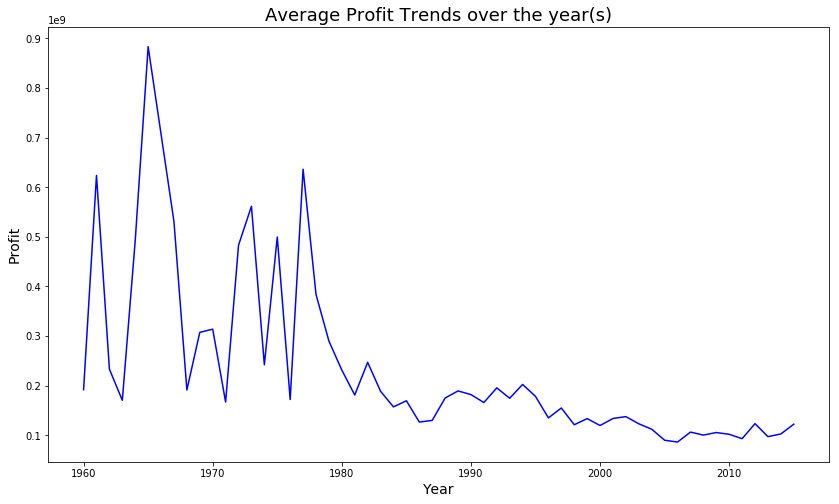

In [11]:
#average Profit over the year(s)?
df.groupby('release_year')['profit'].mean().plot(kind = 'line', figsize = (14, 8), color = 'b')
plt.title('Average Profit Trends over the year(s)', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Profit', fontsize = 14);


We can notice from the line chart that average profit at top in 60s which might indicate few number of movies released at this time.

#### Question 2 : Which release month profited the most over the years?




To be more specific about Profit growth analyze i thought i should got month profited the most over the years.This time i use the bar chart.

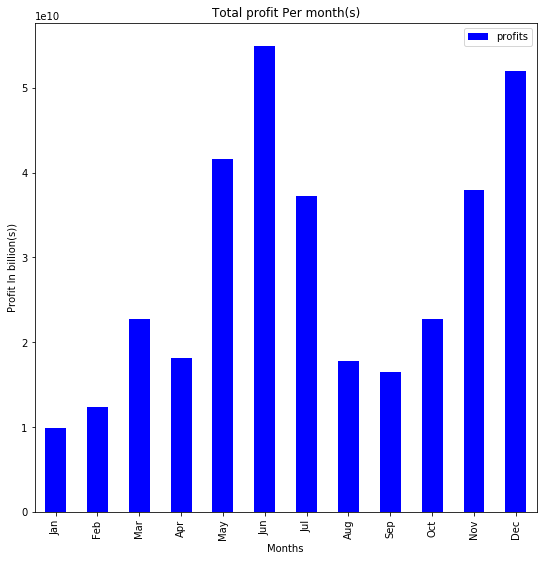

In [12]:
## specific Profit growth information using months
profit_by_month = df.groupby('release_month')['profit'].sum()
df1=pd.DataFrame()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df1['profits'] = list(profit_by_month.get_values())
df1['Months']=months
df1.plot(x='Months',y='profits',kind='bar',figsize=(9,9),color='B');
plt.title('Total profit Per month(s)');
plt.ylabel('Profit In billion(s))');


Obviously the bar chart show that Jun and Dec are profited the most, i can interpret that most people go to cinema in holiday months, but we cannot confirm this point .


####  Question 3 : What's the relation between Popularity and Profits?




I always hear that Popularity got highest profits so i decided to analyze the relation between Popularity and Profits and test the assumptions on the data using scatter plot.


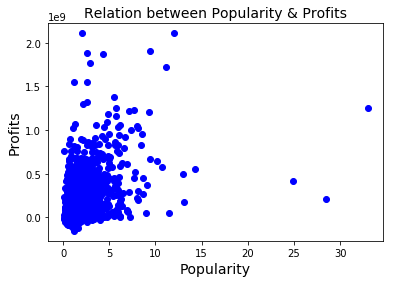

In [13]:
# What's the relation between Popularity and Profits?
plt.scatter(x=df['popularity'],y=df['profit'], color = 'b')
plt.title('Relation between Popularity & Profits', fontsize = 14)
plt.xlabel('Popularity', fontsize = 14)
plt.ylabel('Profits', fontsize = 14);



Now i got Strange result , As we can see from scatter plot Popular movies not necessary the highest profits 


##  Research Questions About  budget


>All investers ask accountant about product or industry range budget to know if they can work with it or not .

So my second group in this Research will be about budget by produce information for most &least expensive movies using viualization of histogram distribution.


Also decided to analyze the relation between rating and budget to understand if rating effect on budget .

####  Question 1 : Which movies got the biggest budget?


Here I sorted movies by budget and get the 100 most expensive movies from our database

In [14]:
# the 100 most expensive movies 

sorted_budget_biggest = df.sort_values(by=['budget_adj'], ascending = False).head(100)


In [15]:
# create variable to Save our results in.....

max_budget_vote = sorted_budget_biggest.groupby(['original_title'])['vote_average'].mean()

Visualize result using histogram distribution.

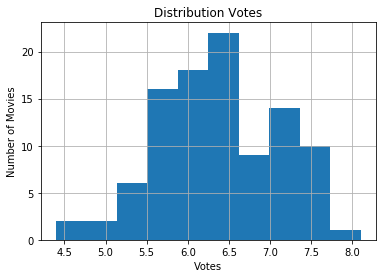

In [16]:
# Create a plot to visualize the results
plt.xlabel('Votes')
plt.ylabel('Number of Movies')
plt.title('Distribution Votes')
max_budget_vote.hist(histtype = 'stepfilled', label = 'Rates for Most Expensive Movies')

#### Research Question 2 :Which movies got the cheapest budget?

Now I sorted movies by budget and get the 100 most cheapest movies from our database


In [17]:
# the 100 cheapest movies 
 
sorted_budget_cheapest = df.sort_values(by=['budget_adj'], ascending = True).head(100)


In [18]:
# create variable to Save result in

cheapest_budget_vote = sorted_budget_cheapest.groupby('original_title')['vote_average'].mean()

Visualize result using histogram distribution.

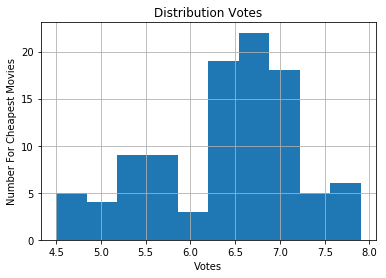

In [19]:
plt.xlabel('Votes')
plt.ylabel('Number For Cheapest Movies')
plt.title('Distribution Votes')

cheapest_budget_vote.hist(label = 'Rates for Cheapest Movies')


#### Research Question 3: What's the relation between rating and budget?


Visualize Compared results in one diagram using histogram distribution so we can notice the effect for rating on budget.



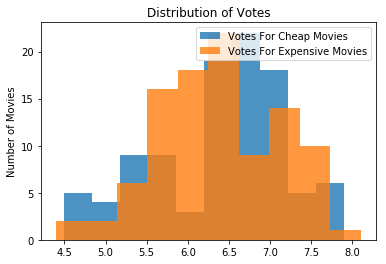

In [20]:
plt.hist(cheapest_budget_vote, alpha=0.8, label='Votes For Cheap Movies')
plt.hist(max_budget_vote, alpha=0.8, label='Votes For Expensive Movies')
plt.ylabel('Number of Movies')
plt.title('Distribution of Votes')
plt.legend(loc='upper right')
plt.show()

We can notice that most expensive movies generally got better rating than cheaper ones. 

Depending on diagram we can notice that expensive movies best rating is more than 8 while the best rating for cheapest movies is lower than 7.8.

<a id='conclusions'></a>
## Conclusions


- We can say that movies industry growing every year depending on graph (Average Profit Trends over the year(s)) for first time we may think companies losing their money,but infact, this due to increase in number of produced movies for that the mean seems less than 60s and 70s.

- We shouldnt depend on Popularity to produce more Profits as we can see that many of the most profited movies are not among the ranked popular. Popular mean is 1.564910.

- We can recomended investors and producer to invest and release movies on Jun and Dec coz they might  get less number of released movies  which mean less competition and more money .

- From analyzed ratings of the most and least expensive movies and I found out that the more expensive movies got higher votes than the cheaper ones .


# Limitations: 

<br>I gess the main limitation for me was missing lot of values ,actually dataset given to me was 10886 rows in total, but when i cleaned a lot of missing values , dropped Rows with NaN values and remove non-commercial movies ,the cleaning data became 2608 rows which indicated losing round 8283 rows (76% of our data). 

So I can not say my analysis has 100% accuracy.


In [21]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295